In [1]:
!pip install torch torchvision torchaudio
!pip install easyocr

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_PATH = "MenAtWork.png"

In [4]:
languages = ['en', 'es', 'fr']  #English, Spanish, French Language
reader = easyocr.Reader(languages, gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.
C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

[([[44, 113], [455, 113], [455, 222], [44, 222]],
  'CAUTION',
  0.9990160718377572),
 ([[240, 236], [456, 236], [456, 310], [240, 310]],
  'MEN AT',
  0.8798786147800828),
 ([[260, 312], [436, 312], [436, 384], [260, 384]],
  'WORK',
  0.9990512132644653)]

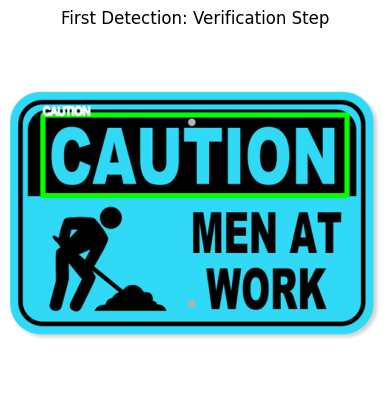

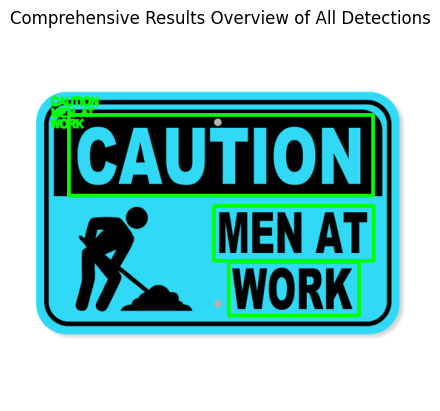

In [5]:
try:
    img = cv2.imread(IMAGE_PATH)
    if img is None:
        raise ValueError("Image not found or could not be read.")

    # Performing OCR on the image
    result = reader.readtext(IMAGE_PATH)

    # Checking if any text was detected
    if not result:
        raise ValueError("No text detected in the image.")

    # Draw rectangle and add detected text for the first detection
    top_left = tuple(result[0][0][0])
    bottom_right = tuple(result[0][0][2])
    text = result[0][1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, .5, (255, 255, 255), 2, cv2.LINE_AA)
    plt.title('First Detection: Verification Step')  
    plt.axis('off')
    plt.imshow(img)
    plt.show()

    # Reset image for displaying all detected texts
    img = cv2.imread(IMAGE_PATH)
    spacer = 100
    for detection in result:
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        spacer += 15

    # Display the processed image with all detected texts
    plt.title('Comprehensive Results Overview of All Detections')  
    plt.axis('off')
    plt.imshow(img)
    plt.show()

except ValueError as e:
    print("Error: ",e)
except Exception as e:
    print("An unexpected error occurred:", e)